In [1]:
import numpy 
import pandas 

import glob

import matplotlib.pylab as plt
import matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D

Using TensorFlow backend.


In [3]:
housenumbers = glob.glob('../../data/digit/*')
housenumbers

['../../data/digit/test_labels.csv',
 '../../data/digit/extra',
 '../../data/digit/test.tar',
 '../../data/digit/test',
 '../../data/digit/train',
 '../../data/digit/extra_labels_2.csv',
 '../../data/digit/housenumbers',
 '../../data/digit/train_images_2.csv',
 '../../data/digit/train_labels.csv',
 '../../data/digit/train_labels_2.csv',
 '../../data/digit/extra.tar',
 '../../data/digit/extra_images.csv',
 '../../data/digit/test_images.csv',
 '../../data/digit/test_images_2.csv',
 '../../data/digit/test_labels_2.csv',
 '../../data/digit/svhn-preproccessed-fragments.zip',
 '../../data/digit/extra_labels.csv',
 '../../data/digit/extra_images_2.csv',
 '../../data/digit/train_images.csv',
 '../../data/digit/train.tar']

In [4]:
train_images = pandas.read_csv('../../data/digit/train_images.csv')
train_labels = pandas.read_csv('../../data/digit/train_labels.csv')

test_images = pandas.read_csv('../../data/digit/test_images.csv')
test_labels = pandas.read_csv('../../data/digit/test_labels.csv')

extra_images = pandas.read_csv('../../data/digit/extra_images.csv')
extra_labels = pandas.read_csv('../../data/digit/extra_labels.csv')

In [5]:
train_images.ix[:10,:10]


,filename,0,1,2,3,4,5,6,7,8
0,5502.png,0.352349,0.366906,0.373620,0.360278,0.330929,0.309424,0.293906,0.297059,0.304902
1,6876.png,0.754941,0.726082,0.680365,0.628380,0.572475,0.520447,0.486898,0.469718,0.449831
2,12741.png,0.180714,0.192925,0.204243,0.226600,0.233271,0.227729,0.225663,0.221294,0.218545
3,32307.png,0.884024,0.884024,0.876180,0.864416,0.852651,0.833043,0.793102,0.750412,0.706549
4,8723.png,0.352416,0.351690,0.358639,0.368573,0.373008,0.392616,0.414012,0.412047,0.390263
5,14657.png,0.671937,0.669145,0.678161,0.686451,0.692675,0.693122,0.689200,0.745722,0.826902
6,9317.png,0.345863,0.345863,0.345863,0.341941,0.334545,0.328322,0.323227,0.317004,0.309161
7,6487.png,0.337051,0.347600,0.352651,0.354227,0.361792,0.371702,0.368227,0.348620,0.322063
8,2749.png,0.069988,0.078961,0.087933,0.076573,0.104961,0.176400,0.213761,0.218576,0.212353
9,13739.png,0.198686,0.189714,0.177267,0.171937,0.177200,0.194910,0.216988,0.235145,0.239961


In [6]:
train_labels.ix[:10,:]

,filename,0,1,2,3,4
0,5502.png,10.0,10.0,10.0,3.0,5.0
1,6876.png,10.0,10.0,10.0,1.0,5.0
2,12741.png,10.0,10.0,10.0,2.0,9.0
3,32307.png,10.0,10.0,10.0,10.0,5.0
4,8723.png,10.0,10.0,10.0,3.0,6.0
5,14657.png,10.0,10.0,3.0,7.0,8.0
6,9317.png,10.0,10.0,10.0,10.0,2.0
7,6487.png,10.0,2.0,4.0,2.0,3.0
8,2749.png,10.0,10.0,10.0,3.0,6.0
9,13739.png,10.0,10.0,10.0,4.0,1.0


In [7]:
train_images = train_images.ix[:,1:].as_matrix().astype('float32')
train_labels = train_labels.ix[:,1:].as_matrix().astype('int16')

test_images = test_images.ix[:,1:].as_matrix().astype('float32')
test_labels = test_labels.ix[:,1:].as_matrix().astype('int16')

extra_images = extra_images.ix[:,1:].as_matrix().astype('float32')
extra_labels = extra_labels.ix[:,1:].as_matrix().astype('int16')

Label:  [10 10 10  3  1]


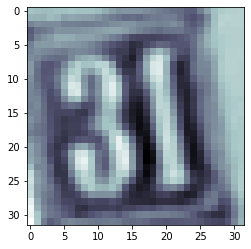

In [8]:
print('Label: ', train_labels[105])
plt.imshow(train_images[105].reshape(32,32), cmap=plt.cm.bone);

In [9]:
def digit_to_categorical(data):
    n = data.shape[1]
    data_cat = numpy.empty([len(data), n, 11])    
    for i in range(n):
        data_cat[:, i] = to_categorical(data[:, i], num_classes=11)        
    return data_cat


In [10]:
x_train = numpy.concatenate((train_images.reshape(-1, 32, 32, 1),
                             test_images.reshape(-1, 32, 32, 1)),
                            axis=0)
y_train = numpy.concatenate((digit_to_categorical(train_labels),
                             digit_to_categorical(test_labels)),
                            axis=0)

x_valid = extra_images.reshape(-1, 32, 32, 1)
y_valid = digit_to_categorical(extra_labels)

n = int(len(x_valid)/2)
x_test, y_test = x_valid[:n], y_valid[:n]
x_valid, y_valid = x_valid[n:], y_valid[n:]

x_train.shape, x_test.shape, x_valid.shape, \
y_train.shape, y_test.shape, y_valid.shape

((19000, 32, 32, 1),
 (6500, 32, 32, 1),
 (6500, 32, 32, 1),
 (19000, 5, 11),
 (6500, 5, 11),
 (6500, 5, 11))

In [11]:
y_train_list = [y_train[:, i] for i in range(5)]
y_test_list = [y_test[:, i] for i in range(5)]
y_valid_list = [y_valid[:, i] for i in range(5)]

In [12]:
def cnn_model():    
    model_input = Input(shape=(32, 32, 1))
    x = BatchNormalization()(model_input)
        
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
    x = MaxPooling2D(pool_size=(2, 2))(x) 
    
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)    
    x = Dropout(0.25)(x)
    
    x = Conv2D(64, (3, 3), activation='relu')(x)       
    x = Conv2D(64, (3, 3), activation='relu')(x)    
    x = Dropout(0.25)(x)
    
    x = Conv2D(196, (3, 3), activation='relu')(x)    
    x = Dropout(0.25)(x)
              
    x = Flatten()(x)
    
    x = Dense(512, activation='relu')(x)    
    x = Dropout(0.5)(x)
    
    y1 = Dense(11, activation='softmax')(x)
    y2 = Dense(11, activation='softmax')(x)
    y3 = Dense(11, activation='softmax')(x)
    y4 = Dense(11, activation='softmax')(x)
    y5 = Dense(11, activation='softmax')(x)
    
    model = Model(input=model_input, output=[y1, y2, y3, y4, y5])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
cnn_model = cnn_model()
cnn_checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', 
                                   verbose=2, save_best_only=True)


In [14]:
cnn_history = cnn_model.fit(x_train, y_train_list, 
                            validation_data=(x_valid, y_valid_list), 
                            epochs=75, batch_size=128, verbose=2, 
                            callbacks=[cnn_checkpointer])


Train on 19000 samples, validate on 6500 samples
Epoch 1/75
 - 6s - loss: 6.2171 - dense_2_loss: 0.0965 - dense_3_loss: 0.2799 - dense_4_loss: 1.1413 - dense_5_loss: 2.3328 - dense_6_loss: 2.3640 - dense_2_accuracy: 0.9926 - dense_3_accuracy: 0.9593 - dense_4_accuracy: 0.7227 - dense_5_accuracy: 0.1476 - dense_6_accuracy: 0.1060 - val_loss: 6.8537 - val_dense_2_loss: 0.0254 - val_dense_3_loss: 0.3273 - val_dense_4_loss: 1.7873 - val_dense_5_loss: 2.4037 - val_dense_6_loss: 2.3096 - val_dense_2_accuracy: 0.9994 - val_dense_3_accuracy: 0.9295 - val_dense_4_accuracy: 0.3998 - val_dense_5_accuracy: 0.0515 - val_dense_6_accuracy: 0.1222

Epoch 00001: val_loss improved from inf to 6.85375, saving model to weights.best.cnn.hdf5
Epoch 2/75
 - 5s - loss: 5.5229 - dense_2_loss: 0.0074 - dense_3_loss: 0.1612 - dense_4_loss: 0.9007 - dense_5_loss: 2.1383 - dense_6_loss: 2.3149 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9656 - dense_4_accuracy: 0.7343 - dense_5_accuracy: 0.2306 - dense_6_acc


Epoch 00012: val_loss improved from 2.62529 to 2.48283, saving model to weights.best.cnn.hdf5
Epoch 13/75
 - 5s - loss: 2.1677 - dense_2_loss: 0.0025 - dense_3_loss: 0.0805 - dense_4_loss: 0.4038 - dense_5_loss: 0.8109 - dense_6_loss: 0.8711 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9744 - dense_4_accuracy: 0.8720 - dense_5_accuracy: 0.7342 - dense_6_accuracy: 0.7089 - val_loss: 2.4138 - val_dense_2_loss: 0.0055 - val_dense_3_loss: 0.1440 - val_dense_4_loss: 0.7551 - val_dense_5_loss: 0.7298 - val_dense_6_loss: 0.7788 - val_dense_2_accuracy: 0.9994 - val_dense_3_accuracy: 0.9629 - val_dense_4_accuracy: 0.7538 - val_dense_5_accuracy: 0.7780 - val_dense_6_accuracy: 0.7545

Epoch 00013: val_loss improved from 2.48283 to 2.41375, saving model to weights.best.cnn.hdf5
Epoch 14/75
 - 5s - loss: 2.0741 - dense_2_loss: 0.0017 - dense_3_loss: 0.0760 - dense_4_loss: 0.3931 - dense_5_loss: 0.7694 - dense_6_loss: 0.8332 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9760 - dense_4_accura

 - 5s - loss: 1.5998 - dense_2_loss: 0.0016 - dense_3_loss: 0.0604 - dense_4_loss: 0.3342 - dense_5_loss: 0.5649 - dense_6_loss: 0.6375 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9809 - dense_4_accuracy: 0.8944 - dense_5_accuracy: 0.8193 - dense_6_accuracy: 0.7887 - val_loss: 1.7744 - val_dense_2_loss: 0.0051 - val_dense_3_loss: 0.1226 - val_dense_4_loss: 0.6373 - val_dense_5_loss: 0.4708 - val_dense_6_loss: 0.5382 - val_dense_2_accuracy: 0.9994 - val_dense_3_accuracy: 0.9674 - val_dense_4_accuracy: 0.7957 - val_dense_5_accuracy: 0.8532 - val_dense_6_accuracy: 0.8280

Epoch 00025: val_loss improved from 1.82696 to 1.77445, saving model to weights.best.cnn.hdf5
Epoch 26/75
 - 5s - loss: 1.5570 - dense_2_loss: 0.0015 - dense_3_loss: 0.0597 - dense_4_loss: 0.3178 - dense_5_loss: 0.5567 - dense_6_loss: 0.6219 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9807 - dense_4_accuracy: 0.8985 - dense_5_accuracy: 0.8214 - dense_6_accuracy: 0.7944 - val_loss: 1.7482 - val_dense_2_loss: 0.0

 - 5s - loss: 1.3366 - dense_2_loss: 0.0012 - dense_3_loss: 0.0520 - dense_4_loss: 0.2859 - dense_5_loss: 0.4667 - dense_6_loss: 0.5293 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9827 - dense_4_accuracy: 0.9074 - dense_5_accuracy: 0.8506 - dense_6_accuracy: 0.8268 - val_loss: 1.5925 - val_dense_2_loss: 0.0048 - val_dense_3_loss: 0.1179 - val_dense_4_loss: 0.5751 - val_dense_5_loss: 0.4162 - val_dense_6_loss: 0.4780 - val_dense_2_accuracy: 0.9994 - val_dense_3_accuracy: 0.9686 - val_dense_4_accuracy: 0.8177 - val_dense_5_accuracy: 0.8785 - val_dense_6_accuracy: 0.8486

Epoch 00037: val_loss did not improve from 1.58099
Epoch 38/75
 - 5s - loss: 1.3183 - dense_2_loss: 0.0010 - dense_3_loss: 0.0511 - dense_4_loss: 0.2876 - dense_5_loss: 0.4609 - dense_6_loss: 0.5172 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9838 - dense_4_accuracy: 0.9079 - dense_5_accuracy: 0.8510 - dense_6_accuracy: 0.8333 - val_loss: 1.5696 - val_dense_2_loss: 0.0056 - val_dense_3_loss: 0.1227 - val_dense_


Epoch 00049: val_loss improved from 1.46306 to 1.44894, saving model to weights.best.cnn.hdf5
Epoch 50/75
 - 5s - loss: 1.1744 - dense_2_loss: 0.0013 - dense_3_loss: 0.0456 - dense_4_loss: 0.2601 - dense_5_loss: 0.4049 - dense_6_loss: 0.4626 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9855 - dense_4_accuracy: 0.9161 - dense_5_accuracy: 0.8697 - dense_6_accuracy: 0.8489 - val_loss: 1.4467 - val_dense_2_loss: 0.0051 - val_dense_3_loss: 0.1243 - val_dense_4_loss: 0.5200 - val_dense_5_loss: 0.3749 - val_dense_6_loss: 0.4221 - val_dense_2_accuracy: 0.9994 - val_dense_3_accuracy: 0.9674 - val_dense_4_accuracy: 0.8352 - val_dense_5_accuracy: 0.8945 - val_dense_6_accuracy: 0.8680

Epoch 00050: val_loss improved from 1.44894 to 1.44673, saving model to weights.best.cnn.hdf5
Epoch 51/75
 - 5s - loss: 1.1503 - dense_2_loss: 0.0013 - dense_3_loss: 0.0436 - dense_4_loss: 0.2558 - dense_5_loss: 0.3935 - dense_6_loss: 0.4561 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9854 - dense_4_accura


Epoch 00062: val_loss did not improve from 1.39359
Epoch 63/75
 - 5s - loss: 1.0684 - dense_2_loss: 8.9553e-04 - dense_3_loss: 0.0411 - dense_4_loss: 0.2411 - dense_5_loss: 0.3676 - dense_6_loss: 0.4177 - dense_2_accuracy: 0.9998 - dense_3_accuracy: 0.9866 - dense_4_accuracy: 0.9233 - dense_5_accuracy: 0.8800 - dense_6_accuracy: 0.8649 - val_loss: 1.4033 - val_dense_2_loss: 0.0075 - val_dense_3_loss: 0.1265 - val_dense_4_loss: 0.4940 - val_dense_5_loss: 0.3659 - val_dense_6_loss: 0.4091 - val_dense_2_accuracy: 0.9994 - val_dense_3_accuracy: 0.9697 - val_dense_4_accuracy: 0.8520 - val_dense_5_accuracy: 0.8989 - val_dense_6_accuracy: 0.8725

Epoch 00063: val_loss did not improve from 1.39359
Epoch 64/75
 - 5s - loss: 1.0275 - dense_2_loss: 9.9193e-04 - dense_3_loss: 0.0402 - dense_4_loss: 0.2290 - dense_5_loss: 0.3484 - dense_6_loss: 0.4100 - dense_2_accuracy: 0.9997 - dense_3_accuracy: 0.9865 - dense_4_accuracy: 0.9254 - dense_5_accuracy: 0.8879 - dense_6_accuracy: 0.8682 - val_loss: 1


Epoch 00075: val_loss did not improve from 1.35339


In [15]:
cnn_model.load_weights('weights.best.cnn.hdf5')
cnn_model.save('model.h5')
cnn_scores = cnn_model.evaluate(x_test, y_test_list, verbose=0)

print("CNN Model 1. \n")
print("Scores: \n" , (cnn_scores))
print("First digit. Accuracy: %.2f%%" % (cnn_scores[6]*100))
print("Second digit. Accuracy: %.2f%%" % (cnn_scores[7]*100))
print("Third digit. Accuracy: %.2f%%" % (cnn_scores[8]*100))
print("Fourth digit. Accuracy: %.2f%%" % (cnn_scores[9]*100))
print("Fifth digit. Accuracy: %.2f%%" % (cnn_scores[10]*100))

print(cnn_model.summary())

CNN Model 1. 

Scores: 
 [1.3584421543708214, 0.005756538826972246, 0.12893635034561157, 0.49562275409698486, 0.334540992975235, 0.4015113115310669, 0.9995384812355042, 0.9692307710647583, 0.8519999980926514, 0.9043076634407043, 0.8721538186073303]
First digit. Accuracy: 99.95%
Second digit. Accuracy: 96.92%
Third digit. Accuracy: 85.20%
Fourth digit. Accuracy: 90.43%
Fifth digit. Accuracy: 87.22%
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   320         input_1[0][0]                    
_______________________________________________________________________________________

In [16]:
avg_accuracy = sum([cnn_scores[i] for i in range(6, 11)])/5

print("CNN Model. Average Accuracy: %.2f%%" % (avg_accuracy*100))

CNN Model. Average Accuracy: 91.94%


## Convert .h5 to .mlmodel

In [23]:
import coremltools

# output_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
your_model = coremltools.converters.keras.convert('model.h5', input_names=['input_0'],
                                                  output_names=['1pos', '2pos', '3pos', '4pos', '5pos'], 
                                                 image_input_names='input_0')

your_model.save('model_digit.mlmodel')

0 : input_1, <keras.engine.input_layer.InputLayer object at 0x7fdfb60214a8>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x7fdfb6021518>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x7fdfb7490390>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x7fdfb6021588>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x7fdfb60217b8>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x7fdfb5b64208>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x7fdfb6021780>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x7fdfb6021b00>
8 : conv2d_3__activation__, <keras.layers.core.Activation object at 0x7fdfb5d63860>
9 : conv2d_4, <keras.layers.convolutional.Conv2D object at 0x7fdfb6021b38>
10 : conv2d_4__activation__, <keras.layers.core.Activation object at 0x7fdfb5d63630>
11 : conv2d_5, <keras.layers.convolutional.Conv2D object at 0x7fdfb6021e48>
12 : conv2d_5__activation__, <keras.layers.core